In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive"

'Getting started.pdf'   image-classification-project


In [4]:
train_data_dir=('/content/drive/My Drive/image-classification-project/data/train')
val_data_dir=('/content/drive/My Drive/image-classification-project/data/val')
test_data_dir=('/content/drive/My Drive/image-classification-project/data/test')

In [5]:
import pandas as pd
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)


from sklearn.model_selection import train_test_split

from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.regularizers import l1, l2, l1_l2
# import pydot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [24]:
# Get all the data in the directory data/test , and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_data_dir,
                                                                        target_size=(196, 196), batch_size=1148, class_mode='binary')
# Get all the data in the directory data/train, and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(train_data_dir,
                                                                         target_size=(196, 196), batch_size=32, class_mode='binary')
# Get all the data in the directory data/val, and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(val_data_dir,
                                                                       target_size=(196, 196), batch_size=32, class_mode='binary')

Found 1148 images belonging to 2 classes.
Found 3543 images belonging to 2 classes.
Found 1162 images belonging to 2 classes.


In [25]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

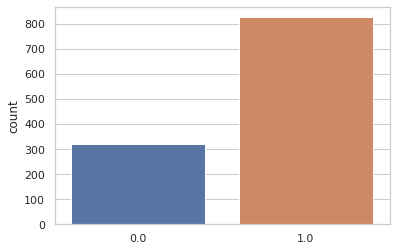

In [27]:
sns.countplot(test_labels)


In [33]:
import os
total_images_train_normal = os.listdir('/content/drive/My Drive/image-classification-project/data/train/NORMAL')
total_images_train_pneumonia = os.listdir('/content/drive/My Drive/image-classification-project/data/train/PNEUMONIA')

total_images_test_normal = os.listdir('/content/drive/My Drive/image-classification-project/data/test/NORMAL')
total_images_test_pneumonia = os.listdir('/content/drive/My Drive/image-classification-project/data/test/PNEUMONIA')

total_images_val_normal = os.listdir('/content/drive/My Drive/image-classification-project/data/val/NORMAL')
total_images_val_pneumonia = os.listdir('/content/drive/My Drive/image-classification-project/data/val/PNEUMONIA')

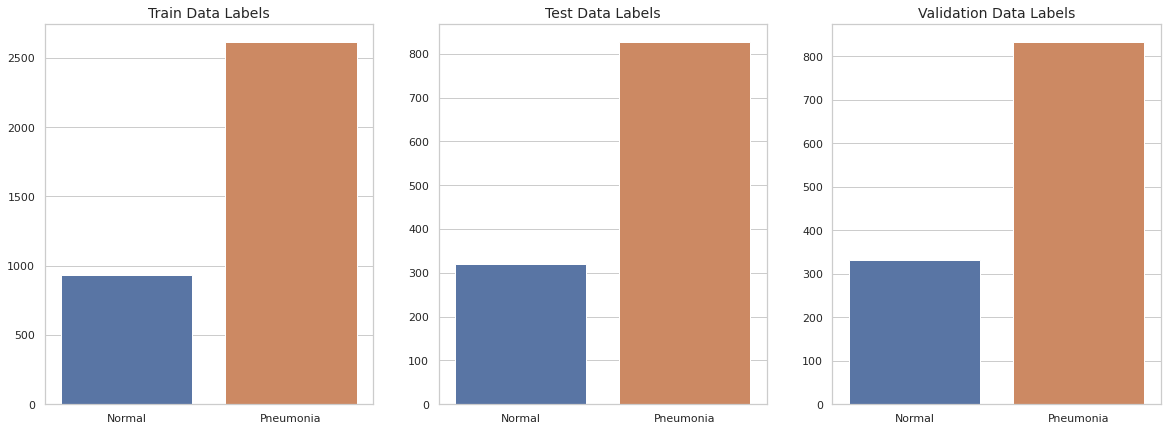

In [34]:
plt.figure(figsize=(20, 7))
plt.subplot(131)
plt.title('Train Data Labels', fontsize=14)
sns.barplot(x=['Normal','Pneumonia'],y=[len(total_images_train_normal),len(total_images_train_pneumonia)])
plt.subplot(132)
plt.title('Test Data Labels', fontsize=14)
sns.barplot(x=['Normal','Pneumonia'],y=[len(total_images_test_normal),len(total_images_test_pneumonia)])
plt.subplot(133)
plt.title('Validation Data Labels', fontsize=14)
sns.barplot(x=['Normal','Pneumonia'],y=[len(total_images_val_normal),len(total_images_val_pneumonia)])
plt.show()

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(8, (7, 7),  activation='relu', input_shape=(196, 196, 3)))
cnn.add(Conv2D(8, (7, 7),  activation='relu'))
cnn.add(MaxPooling2D(pool_size = (3, 3)))

cnn.add(Conv2D(16, (5, 5),  activation='relu'))
cnn.add(Conv2D(16, (5, 5),  activation='relu'))
cnn.add(MaxPooling2D(pool_size = (3, 3)))

cnn.add(Conv2D(32, (3, 3),  activation='relu'))
cnn.add(Conv2D(32, (3, 3),  activation='relu'))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size = (2, 2)))


cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = Adam(lr=0.0001, decay=1e-5)
cnn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_98 (Conv2D)           (None, 190, 190, 8)       1184      
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 184, 184, 8)       3144      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 61, 61, 8)         0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 57, 57, 16)        3216      
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 53, 53, 16)        6416      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 17, 17, 16)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 15, 15, 32)      

In [ ]:
cnn_history = cnn.fit_generator(train_generator, epochs=10, validation_data=val_generator )

Epoch 1/10
148/148 [==============================] - 2162s 15s/step - loss: 0.5722 - accuracy: 0.7482 - val_loss: 0.5669 - val_accuracy: 0.6718
Epoch 2/10
148/148 [==============================] - 54s 363ms/step - loss: 0.3422 - accuracy: 0.8458 - val_loss: 0.1898 - val_accuracy: 0.8752
Epoch 3/10
148/148 [==============================] - 56s 375ms/step - loss: 0.2455 - accuracy: 0.8920 - val_loss: 0.1892 - val_accuracy: 0.8906
Epoch 4/10
148/148 [==============================] - 56s 377ms/step - loss: 0.1811 - accuracy: 0.9268 - val_loss: 0.1373 - val_accuracy: 0.9079
Epoch 5/10
148/148 [==============================] - 55s 375ms/step - loss: 0.1446 - accuracy: 0.9410 - val_loss: 0.1979 - val_accuracy: 0.8983
Epoch 6/10
148/148 [==============================] - 55s 369ms/step - loss: 0.1308 - accuracy: 0.9499 - val_loss: 0.2733 - val_accuracy: 0.9040
Epoch 7/10
148/148 [==============================] - 55s 369ms/step - loss: 0.1254 - accuracy: 0.9501 - val_loss: 0.2661 - val_ac

In [ ]:
test_loss, test_accuracy = cnn.evaluate_generator(test_generator)
print("Test loss= ", test_loss, "\n Test accuracy = ", test_accuracy)

NameError: ignored